In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [8]:
# Importing data

data_set = pd.read_csv('cleaned_data.csv')

# Set index column

data_set.set_index('audio file',inplace=True)

data_set.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,loudness_sma3_amean,loudness_sma3_stddevNorm,loudness_sma3_stddevFallingSlope,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc2_sma3_stddevNorm,mfcc3_sma3_stddevNorm,...,slopeV0-500_sma3nz_stddevNorm,slopeV500-1500_sma3nz_stddevNorm,spectralFluxV_sma3nz_amean,spectralFluxV_sma3nz_stddevNorm,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,MeanVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,equivalentSoundLevel_dBp,status
audio file,,,,,,,,,,,,,,,,,,,,,
adrso024,22.836117,7.935173,150.88577,0.549328,0.831140,5.262211,0.508837,1.326787,1.659299,2.070628,...,0.882923,-0.567350,0.550346,1.225269,0.163655,1.585821,0.733627,0.100488,-26.253954,ad
adrso025,25.950464,11.863705,177.42262,0.398178,1.058877,5.992081,0.200731,1.719531,1.825399,1.010119,...,0.633215,-0.695343,0.327789,1.311078,0.069983,0.774302,0.213387,0.221147,-32.320164,ad
adrso027,19.768696,11.135247,167.47725,0.460953,0.707600,5.662509,0.207583,1.357751,0.648870,1.462580,...,12.945907,-0.940123,0.283992,1.236332,0.134296,0.727537,0.099811,0.112874,-34.366104,ad
adrso028,22.070637,13.376965,147.31458,0.399583,1.533441,8.396350,0.202821,2.647187,3.380660,1.010571,...,1.270049,-0.652363,0.235273,2.537468,0.118246,0.482315,0.174490,0.069385,-28.948114,ad
adrso031,29.309093,22.327736,136.47410,0.358402,0.733677,9.875219,0.149938,1.618128,0.852065,1.973424,...,1.526530,-0.909497,0.223593,1.312532,0.083634,0.689995,0.171469,0.208814,-35.530070,ad


In [9]:
# Size of the data set
data_set.shape

(237, 38)

In [10]:
df = data_set

#### Model 1: Logistic Regression 

In [33]:
# Scale data

df_scale = scale(df.iloc[:,:-1])
X = df_scale[:,:-1]
y = df['status']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X.copy(),y.copy(),
                                                       shuffle=True,
                                                       random_state=153,
                                                       stratify=y,
                                                       test_size=.2)


#### Introducing cross-validation

In [34]:
kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 582)

In [35]:
kfold.split(X_train, y_train)

<generator object _BaseKFold.split at 0x0000017F43124280>

In [36]:
# Running cross-validation

j = 0
cutoff = 0.58
precision_mat = np.zeros((1,5))
recall_mat = np.zeros((1,5))
accuracy_mat = np.zeros((1,5))

for train_index, test_index in kfold.split(X_train, y_train):
    
    ### Training
    X_train_train = X_train[train_index,:]
    y_train_train = y_train[train_index]
    
    ### Holdout set
    X_holdout = X_train[test_index,:]
    y_holdout = y_train[test_index]
    
    log_reg = LogisticRegression(penalty=None,max_iter = 500)
    log_reg.fit(X_train_train,
            y_train_train)
    y_prob = log_reg.predict_proba(X_holdout)[:,1]
    
    y_preds = []
 
    for i in y_prob:
        if i <= cutoff:
            y_preds.append('ad')
        else:
            y_preds.append('cn')
                
    precision_mat[0,j] = precision_score(y_holdout, y_preds,average="binary", pos_label="ad")
    recall_mat[0,j] = recall_score(y_holdout, y_preds,average="binary", pos_label="ad")
    accuracy_mat[0,j] = accuracy_score(y_holdout, y_preds)
    
    
    j += 1
    
    
    
    



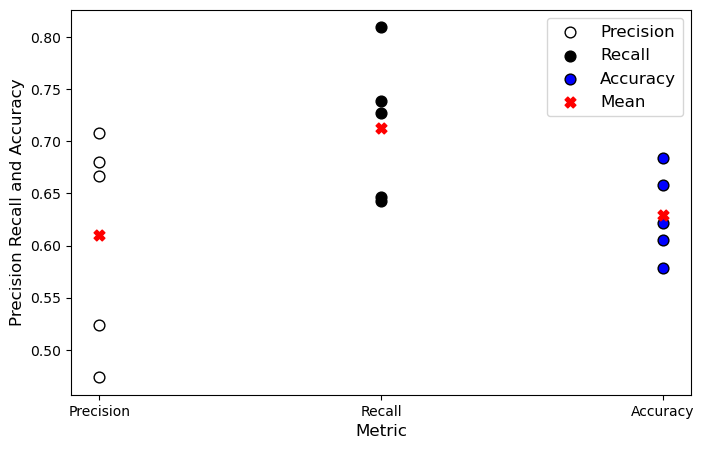

In [37]:
# Let's plot the metrices

plt.figure(figsize=(8,5))
plt.scatter(np.zeros(5), 
            precision_mat[0,:], 
            s=60, 
            c='white',
            edgecolor='black',
            label="Precision")
plt.scatter(np.ones(5), 
            recall_mat[0,:], 
            s=60, 
            c='black',
            edgecolor='black',label ="Recall")
plt.scatter(np.ones(5)*2, 
            accuracy_mat[0,:], 
            s=60, 
            c='blue',
            edgecolor='black',label ="Accuracy")

plt.scatter([0,1,2], 
            [np.mean(precision_mat, axis=1),np.mean(recall_mat, axis=1),np.mean(accuracy_mat, axis=1)], 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

plt.legend(fontsize=12)

plt.xticks([0,1,2],["Precision", "Recall","Accuracy"], fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Metric", fontsize=12)
plt.ylabel("Precision Recall and Accuracy", fontsize=12)

plt.show()

##### Let's test the model

In [39]:
log_reg = LogisticRegression(penalty=None,max_iter = 500)
log_reg.fit(X_train,
            y_train)

LogisticRegression(max_iter=500, penalty=None)

In [40]:
y_prob = log_reg.predict_proba(X_test)[:,1]

In [41]:
y_preds = []

cutoff = 0.58
 
for i in y_prob:
    if i <= cutoff:
        y_preds.append('ad')
    else:
        y_preds.append('cn')

In [42]:
precision = precision_score(y_test, y_preds,average="binary", pos_label="ad")
recall = recall_score(y_test, y_preds,average="binary", pos_label="ad")
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy 0.6458333333333334
Precision: 0.6818181818181818
Recall: 0.6


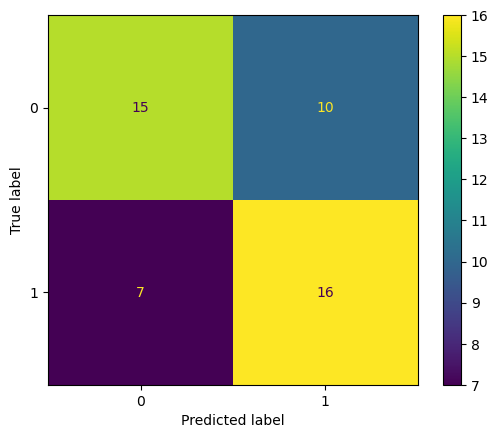

In [43]:
# The confusion matrix 
cm_new = confusion_matrix(y_test, y_preds)

ConfusionMatrixDisplay(confusion_matrix=cm_new).plot();

### Model 2: k-NN model

#### First we will use cross validation

In [44]:
j = 0
precision_knn_mat = np.zeros((1,5))
recall_knn_mat = np.zeros((1,5))
accuracy_knn_mat = np.zeros((1,5))

for train_index, test_index in kfold.split(X_train, y_train):
    
    ### Training
    X_train_train = X_train[train_index,:]
    y_train_train = y_train[train_index]
    
    ### Holdout set
    X_holdout = X_train[test_index,:]
    y_holdout = y_train[test_index]
    


    knn_class = KNeighborsClassifier(n_neighbors=5)
    knn_class.fit(X_train_train,
            y_train_train)
    
    y_preds = knn_class.predict(X_holdout)

    precision_knn_mat[0,j] = precision_score(y_holdout, y_preds,average="binary", pos_label="ad")
    recall_knn_mat[0,j] = recall_score(y_holdout, y_preds,average="binary", pos_label="ad")
    accuracy_knn_mat[0,j] = accuracy_score(y_holdout, y_preds)
    
    
    
    j += 1
    
    

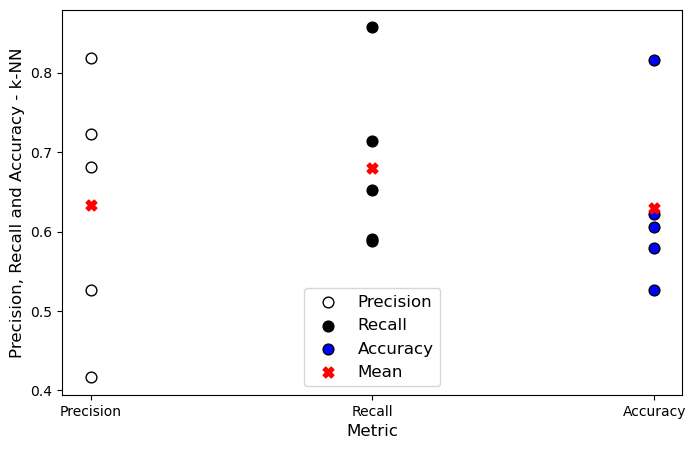

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(np.zeros(5), 
            precision_knn_mat[0,:], 
            s=60, 
            c='white',
            edgecolor='black',
            label="Precision")
plt.scatter(np.ones(5), 
            recall_knn_mat[0,:], 
            s=60, 
            c='black',
            edgecolor='black',label ="Recall")

plt.scatter(np.ones(5)*2, 
            accuracy_knn_mat[0,:], 
            s=60, 
            c='blue',
            edgecolor='black',label ="Accuracy")

plt.scatter([0,1,2], 
            [np.mean(precision_knn_mat, axis=1),np.mean(recall_knn_mat, axis=1),np.mean(accuracy_knn_mat, axis=1)], 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

plt.legend(fontsize=12)

plt.xticks([0,1,2],["Precision", "Recall","Accuracy"], fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Metric", fontsize=12)
plt.ylabel("Precision, Recall and Accuracy - k-NN", fontsize=12)

plt.show()

#### Let's test it using the test set

In [46]:
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train,
            y_train)
    
y_preds = knn_class.predict(X_test)

In [47]:
precision = precision_score(y_test, y_preds,average="binary", pos_label="ad")
recall = recall_score(y_test, y_preds,average="binary", pos_label="ad")
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy 0.6041666666666666
Precision: 0.625
Recall: 0.6


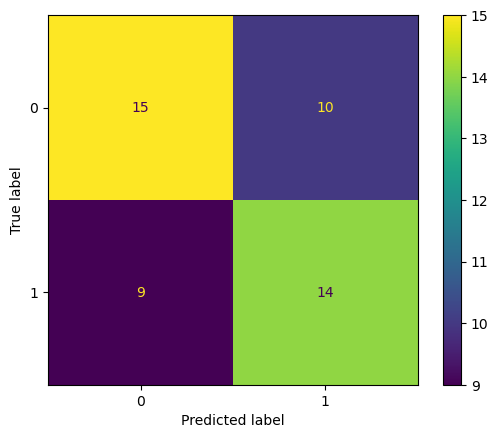

In [48]:
cm_new = confusion_matrix(y_test, y_preds)

ConfusionMatrixDisplay(confusion_matrix=cm_new).plot();

#### Let's do some gridsearchcv with k-NN

In [49]:
parameters = {"n_neighbors": range(1, 15)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)


In [50]:
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)})

In [51]:
gridsearch.best_params_

{'n_neighbors': 5}

We infact did use 5 neighbors for our intial test

### Model 3: SVM modelling

#### Cross Validation first

In [52]:
j = 0
precision_svm_mat = np.zeros((1,5))
recall_svm_mat = np.zeros((1,5))
accuracy_svm_mat = np.zeros((1,5))

for train_index, test_index in kfold.split(X_train, y_train):
    
    ### Training
    X_train_train = X_train[train_index,:]
    y_train_train = y_train[train_index]
    
    ### Holdout set
    X_holdout = X_train[test_index,:]
    y_holdout = y_train[test_index]
       
    
    svc_rbf = SVC(kernel='rbf',C=1,gamma = 0.002)
    
    svc_rbf.fit(X_train_train,
            y_train_train)
    
    y_preds = svc_rbf.predict(X_holdout)
   
    
    precision_svm_mat[0,j] = precision_score(y_holdout, y_preds,average="binary", pos_label="ad")
    recall_svm_mat[0,j] = recall_score(y_holdout, y_preds,average="binary", pos_label="ad")
    accuracy_svm_mat[0,j] = accuracy_score(y_holdout, y_preds)
    
    
    
    j += 1
    
    

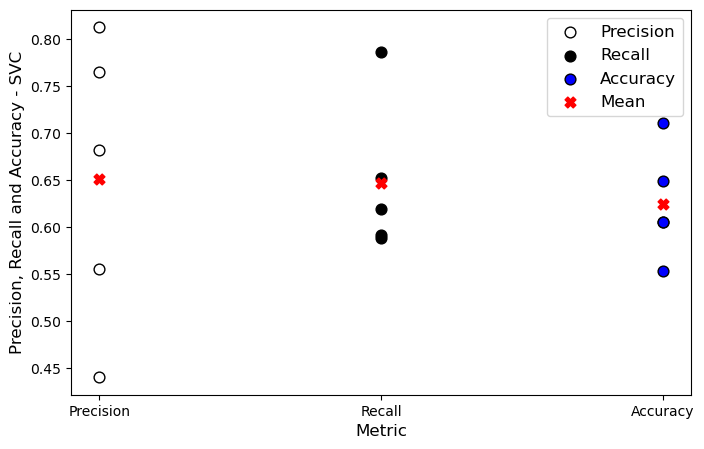

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(np.zeros(5), 
            precision_svm_mat[0,:], 
            s=60, 
            c='white',
            edgecolor='black',
            label="Precision")
plt.scatter(np.ones(5), 
            recall_svm_mat[0,:], 
            s=60, 
            c='black',
            edgecolor='black',label ="Recall")

plt.scatter(np.ones(5)*2, 
            accuracy_svm_mat[0,:], 
            s=60, 
            c='blue',
            edgecolor='black',label ="Accuracy")

plt.scatter([0,1,2], 
            [np.mean(precision_svm_mat, axis=1),np.mean(recall_svm_mat, axis=1),np.mean(accuracy_svm_mat, axis=1)], 
            s=60, 
            c='r',
            marker='X',
            label="Mean")

plt.legend(fontsize=12)

plt.xticks([0,1,2],["Precision", "Recall","Accuracy"], fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Metric", fontsize=12)
plt.ylabel("Precision, Recall and Accuracy - SVC", fontsize=12)

plt.show()

In [54]:
svc_class = SVC(kernel='rbf',C=1,gamma = 0.002)
svc_class.fit(X_train,
            y_train)
    
y_preds = svc_class.predict(X_test)

In [55]:
precision = precision_score(y_test, y_preds,average="binary", pos_label="ad")
recall = recall_score(y_test, y_preds,average="binary", pos_label="ad")
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy',accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy 0.625
Precision: 0.6296296296296297
Recall: 0.68


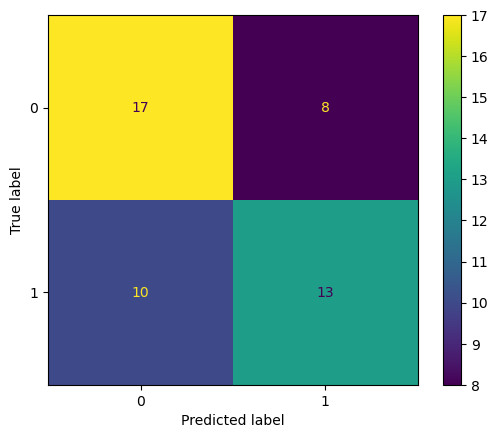

In [56]:
cm_new = confusion_matrix(y_test, y_preds)

ConfusionMatrixDisplay(confusion_matrix=cm_new).plot();

Overall, we see a maximum of 64% accuracy. The best model seems to be logistic regression. However, we consider these models to be baseline models. We are interested in developing a neural network model. Therefore, these baseline models provides us a basis to compare our neural network model.